# AA1-EV01. Presentación interactiva: características y criterios de agrupamiento de datos con Python.


### **Aprendiz:** Jorge Elier Lambraño Arroyo 


##### **Instructor:** Jacobo Tovar Molano


**Programa de formación:** Algoritmo de agrupamiento no supervisado K-means con Python. 


**Servicio Nacional de Aprendizaje - Sena** 


Esta evidencia, la cual es una presentación interactiva que muestra el desarrollo de las tareas planteadas
inicialmente, usando Python en Jupyter lab: 

_____________________________

### Importar paquetes


En esta celda, importamos los paquetes más importantes que utilizaremos para el análisis exploratorio de datos:

- **numpy**: Para trabajar con arrays y cálculos numéricos.
- **pandas**: Para cargar, manipular y analizar los datos en formato tabular.
- **matplotlib.pyplot**: Para crear visualizaciones y gráficos.
- **seaborn**: Una librería de visualización que extiende las capacidades de matplotlib y permite crear gráficos más atractivos y descriptivos.

Estos paquetes nos proporcionarán las herramientas necesarias para explorar y comprender los datos del conjunto `Mall_Customers.csv` que utilizaremos en las actividades.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

________________________________

### Lectura de los datos del conjunto de datos 


En esta celda, cargamos el conjunto de datos mall_customers.csv en un DataFrame de pandas utilizando la función pd.read_csv().

El DataFrame df ahora contiene todas las filas y columnas del archivo CSV, lo que nos permitirá explorar y analizar los datos de manera más sencilla.

In [4]:
DATASET_FILEPATH = 'mall_customers.csv'
df = pd.read_csv(DATASET_FILEPATH)

Revisar la información general y las primeras filas del DataFrame es un paso fundamental en el análisis exploratorio de datos, ya que nos permite entender la estructura y el contenido del conjunto de datos antes de proceder con análisis más profundos. En esta celda, realizamos dos acciones importantes para explorar inicialmente el conjunto de datos:

- `df.info()`: Esta función nos proporciona información general sobre el DataFrame, como el número de filas y columnas, los tipos de datos de cada columna, y la cantidad de valores no nulos.

Esto nos ayuda a tener una visión general de la estructura y características del conjunto de datos.

- `df.head()`: Esta función muestra las primeras 5 filas del DataFrame, lo que nos permite ver un pequeño extracto de los datos y familiarizarnos con su contenido.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


_______________________

### 📊 Campos del dataset y sus tipos de datos

1. **CustomerID**

   * **Tipo de dato:** `int64` (entero).
   * **Significado:** Es un identificador único para cada cliente.
   * **Uso:** No aporta información para el análisis de segmentación (solo identifica al cliente). Normalmente se excluye al entrenar un modelo.

2. **Gender**

   * **Tipo de dato:** `object` (cadena de texto, categórico).
   * **Significado:** Género del cliente (por ejemplo, "Male" o "Female").
   * **Uso:** Variable categórica, se puede convertir a formato numérico (codificación con *label encoding* o *one-hot encoding*) para usarla en algoritmos.

3. **Age**

   * **Tipo de dato:** `int64` (entero).
   * **Significado:** Edad del cliente en años.
   * **Uso:** Variable numérica que indica la etapa de vida del cliente. Puede influir en los hábitos de compra.

4. **Annual Income (k\$)**

   * **Tipo de dato:** `int64` (entero).
   * **Significado:** Ingreso anual del cliente, expresado en miles de dólares.
   * **Uso:** Importante para segmentar clientes según su **capacidad económica**.

5. **Spending Score (1-100)**

   * **Tipo de dato:** `int64` (entero).
   * **Significado:** Puntuación (entre 1 y 100) asignada por el centro comercial según el gasto y comportamiento de compra.
   * **Uso:** Mide la **tendencia a gastar** de un cliente. Es una variable clave para identificar clientes de alto/medio/bajo valor.

---

## ✅ Resumen de tipos de datos

* **Numéricos (int64):** `Age`, `Annual Income`, `Spending Score`.
* **Categóricos (object):** `Gender`, `CustomerID`

---

🔎 **Interpretación práctica:**

* Variables útiles para el análisis de segmentación (**K-means**) → `Age`, `Annual Income`, `Spending Score`.
* Variables a transformar → `Gender` (de texto a números).
* Variable a descartar en el modelado → `CustomerID` (solo es un identificador).



In [6]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


En esta celda, definimos una función llamada `rename_columns()` que se encarga de renombrar las columnas del DataFrame de una manera más descriptiva y legible.

La razón por la que hacemos esto es la siguiente:

1. **Legibilidad y comprensión**: Los nombres de columnas cortos y abreviados, como los que vienen por defecto en el conjunto de datos, pueden dificultar la comprensión del significado de cada variable. Al renombrar las columnas con nombres más descriptivos, facilita la interpretación de los datos.

2. **Consistencia y convenciones**: Es una buena práctica seguir convenciones de nomenclatura, como utilizar nombres de columnas en minúsculas y separar palabras con guiones bajos (`snake_case`). Esto mejora la legibilidad y la consistencia del código.

3. **Preparación para análisis y visualización**: Tener columnas con nombres descriptivos ayuda a crear gráficos y reportes más claros y fáciles de entender.

Al encapsular esta lógica en una función, podemos reutilizarla fácilmente en otras partes del código si es necesario, lo que mejora la modularidad y mantenibilidad del mismo.

In [7]:
def rename_columns(df):
    """
    Función para renombrar las columnas del DataFrame de manera más descriptiva.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame cuyas columnas se van a renombrar.
    
    Retorna:
    pandas.DataFrame: El DataFrame con las columnas renombradas.
    """
    # Renombrar las columnas
    df.rename(columns={
        'CustomerID': 'customer_id',
        'Gender': 'gender',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    }, inplace=True)
    
    return df

In [8]:
df = rename_columns(df)

In [9]:
df.head(5)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


______________


Se separan las variables  cateǵoricas de las variables de numéricas con el fin de explorar las variables numéricas con estadísticos. Sin embargo, a todas las variables se les calcula su distribución. 


- Solamente hay una variable catergórica: `'gender'`
- Las variables numéricas son: `'age', 'annual_income', 'spending_score'`

In [10]:
CATEGORICAL_COLUMNS = ['gender']
NUMERICAL_COLUMNS = ['age', 'annual_income', 'spending_score']

In [11]:
df = df[CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS] # remove customer_id

En este proceso se elimina la variable customer_id, ya que como funciona como un identificador, no aporta valor al proceso de exploración ni de agrupamiento. 

______________________________

### Datos nulos

In [12]:
df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

1. **Interpretación práctica:**

   * ✅ **`gender` (categórica)** → Todos los clientes tienen género registrado (no hay valores perdidos que requieran imputación).
   * ✅ **`age` (numérica)** → Todos los clientes tienen edad registrada, lo que asegura consistencia en el análisis de segmentación.
   * ✅ **`annual_income` (numérica)** → No hay ingresos faltantes, lo que permite comparar clientes de manera justa.
   * ✅ **`spending_score` (numérica)** → Todas las observaciones tienen puntaje de gasto, lo cual es clave para el clustering con K-means.



2. **análisis de nulos:**

   * El dataset está **completo y limpio** en cuanto a valores nulos.
   * No es necesario aplicar técnicas de **imputación** (como rellenar con la media, mediana o moda).
   * Esto facilita el análisis exploratorio y el modelado con algoritmos de machine learning, porque no hay que tratar valores faltantes.



_______________________


### Analisis de las variables numéricas

In [13]:
df[NUMERICAL_COLUMNS].describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### 📊 **1. Age (Edad)**

* **Media:** 38.85 años → edad promedio de los clientes.
* **Mínimo:** 18 años, **Máximo:** 70 años → el rango de clientes va desde adultos jóvenes hasta adultos mayores.
* **Mediana (50%):** 36 años → la mitad de los clientes tienen 36 años o menos.
* **Rango intercuartílico (IQR = Q3 - Q1):** 49 - 28.75 = **20.25** → dispersión moderada.
* **Interpretación:** La mayoría de los clientes está en un rango de **adultos jóvenes (20–40 años)**, aunque también hay clientes mayores.


#### 📊 **2. Annual Income (Ingreso anual en miles \$)**

* **Media:** 60.56 k\$ → en promedio, los clientes ganan unos 60.5 mil dólares al año.
* **Mínimo:** 15 k\$, **Máximo:** 137 k\$ → clientes desde ingresos bajos hasta muy altos.
* **Mediana (50%):** 61.5 k\$ → distribución bastante centrada en torno al promedio.
* **IQR:** 78 - 41.5 = **36.5** → dispersión amplia.
* **Interpretación:** La tienda atiende clientes de **distintos niveles socioeconómicos**, lo cual es clave para segmentar en marketing.


#### 📊 **3. Spending Score (Puntaje de gasto de 1 a 100)**

* **Media:** 50.2 → en promedio, los clientes tienen un gasto intermedio.
* **Mínimo:** 1, **Máximo:** 99 → hay clientes que casi no gastan y otros que gastan muchísimo.
* **Mediana (50%):** 50 → la mitad de los clientes tienen puntaje ≤ 50, lo cual muestra una **distribución bastante equilibrada**.
* **IQR:** 73 - 34.75 = **38.25** → dispersión amplia.
* **Interpretación:** Hay **alta variabilidad en el comportamiento de compra**, algunos clientes son compradores frecuentes y otros casi no gastan.


#### 🔎 **Conclusión general**

* **Edad:** mayoría adultos jóvenes, pero con rango amplio.
* **Ingreso anual:** variedad importante → se pueden segmentar en **bajo, medio y alto ingreso**.
* **Spending score:** gran dispersión → hay clientes que gastan mucho sin importar ingreso, y otros que gastan poco aunque tengan altos ingresos.

👉 Esto sugiere que el dataset es **ideal para segmentación con K-means**, ya que hay diferencias claras entre clientes en **edad, nivel económico y gasto**.



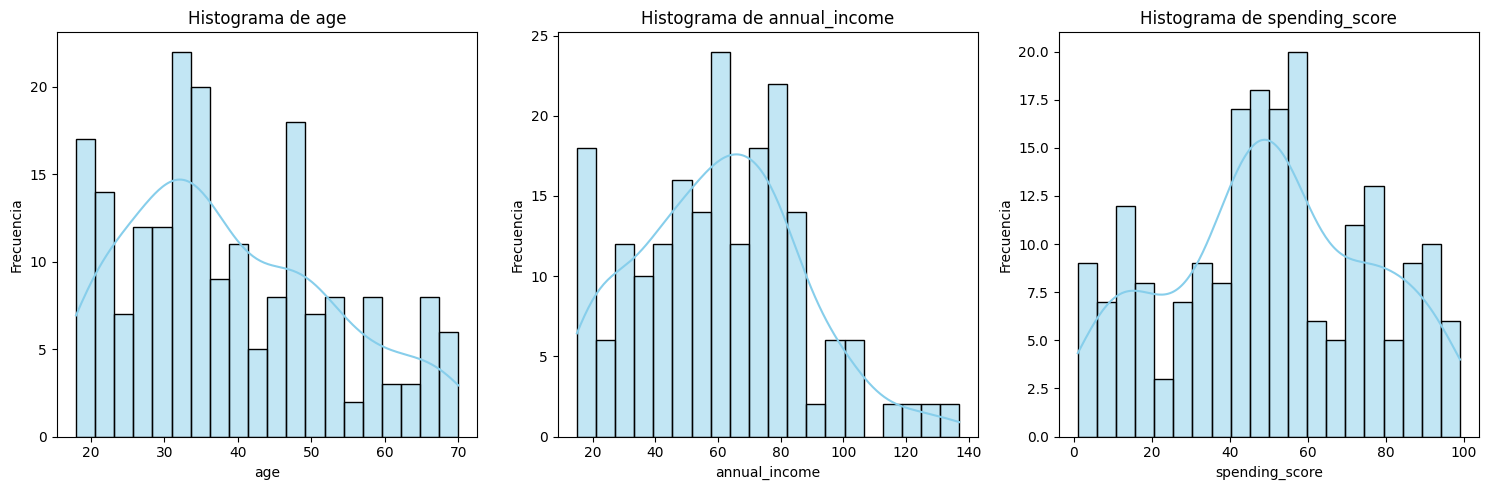

In [14]:
# Definir tamaño de la figura
plt.figure(figsize=(15, 5))

# Loop para graficar
for i, var in enumerate(NUMERICAL_COLUMNS, 1):
    plt.subplot(1, 3, i)  # 1 fila, 3 columnas, posición i
    sns.histplot(df[var], bins=20, kde=True, color="skyblue")
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

_____________________


### Analisis de la variable categorica

In [15]:
df[CATEGORICAL_COLUMNS].value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

/tmp/ipykernel_154383/2121655579.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


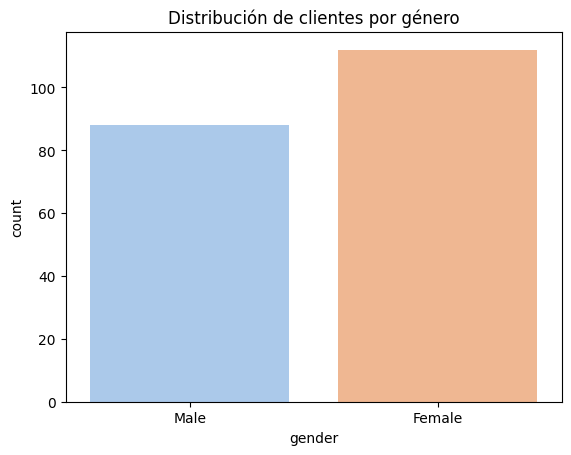

In [16]:
sns.countplot(data=df, x='gender', palette='pastel')
plt.title("Distribución de clientes por género")
plt.show()

* **Proporción:**
  * Mujeres → 112 clientes (56%)
  * Hombres → 88 clientes (44%)

* **Interpretación:**
  * La distribución está **relativamente balanceada**, aunque hay más mujeres que hombres en la muestra.
  * Esto es positivo, porque evita un sesgo fuerte hacia un solo grupo.
  * En análisis de marketing, podría indicar que **las mujeres representan un poco más del mercado objetivo del centro comercial**, pero la diferencia no es extrema.


_______


### Cruce de las variables numericas con la categorica

/tmp/ipykernel_154383/4030311181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="age", palette="Set2")
/tmp/ipykernel_154383/4030311181.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="annual_income", palette="Set3")
/tmp/ipykernel_154383/4030311181.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="spending_score", palette="coolwarm")


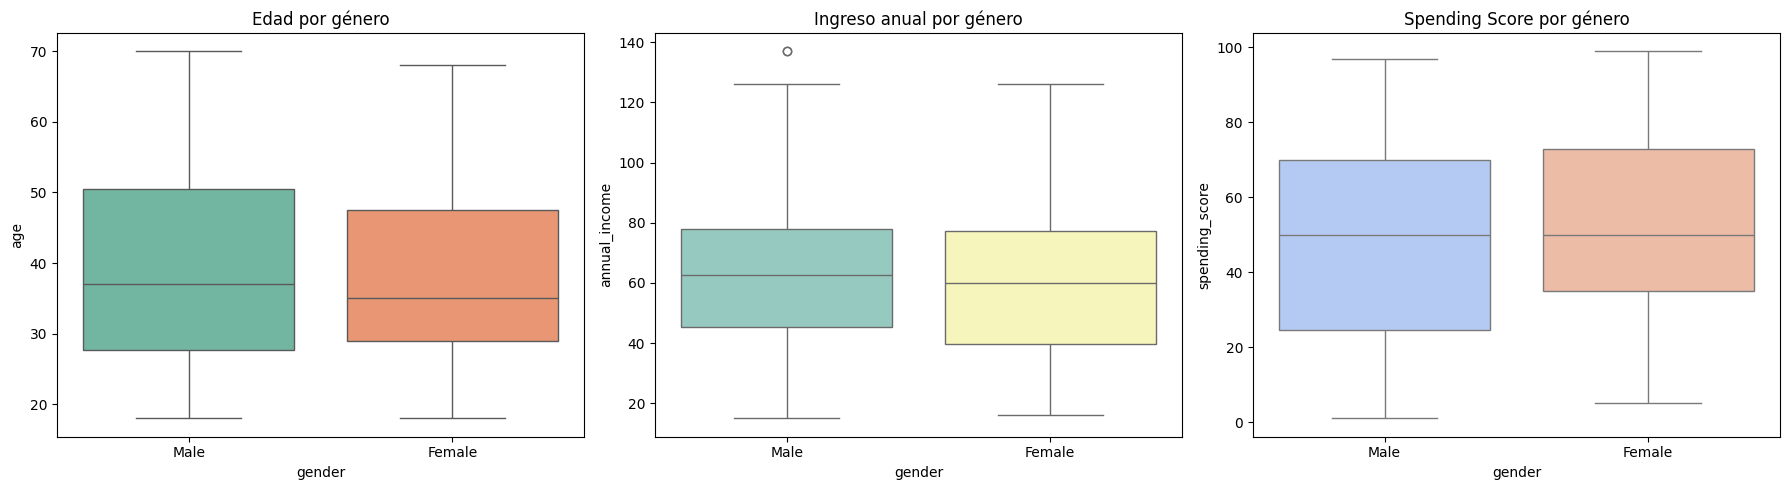

In [17]:
# Definir tamaño de la figura
plt.figure(figsize=(18, 5))

# 1️⃣ Edad por género
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="gender", y="age", palette="Set2")
plt.title("Edad por género")

# 2️⃣ Ingreso anual por género
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="gender", y="annual_income", palette="Set3")
plt.title("Ingreso anual por género")

# 3️⃣ Spending Score por género
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="gender", y="spending_score", palette="coolwarm")
plt.title("Spending Score por género")

# Ajustar diseño
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender_label'] = encoder.fit_transform(df['gender'])

____________________

### Relacion entre variables

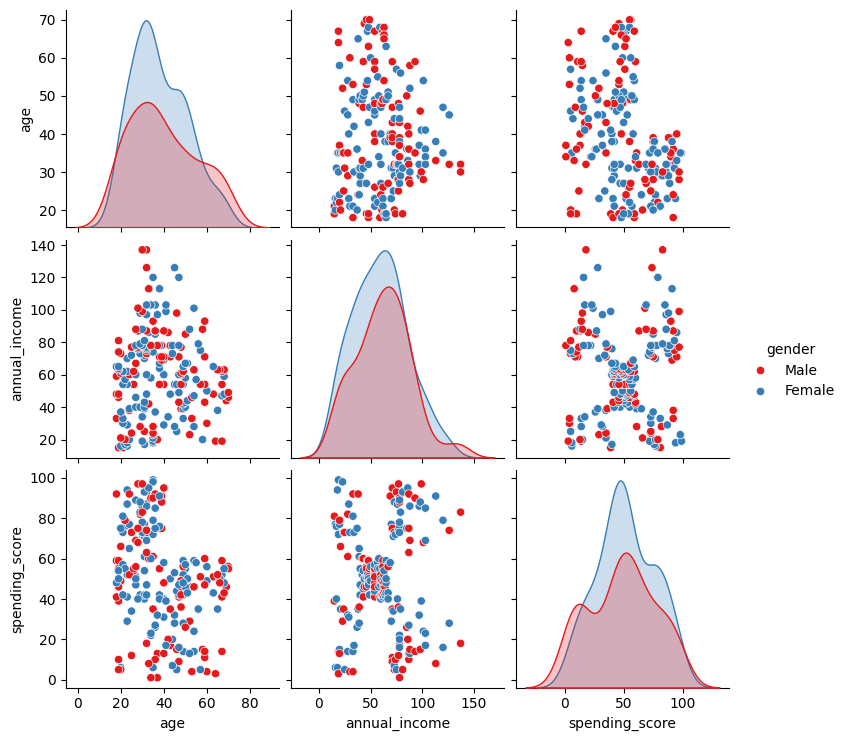

In [19]:
# Seleccionamos solo las columnas numéricas y agregamos Gender
variables = ["age", "annual_income", "spending_score", "gender"]

# Pairplot
sns.pairplot(df[variables], hue="gender", palette="Set1", diag_kind="kde")
plt.show()

Se pueden observar las sigueintes relaciones. 
- No se encuentran una relacion clara entre la variable `gender` y el resto de las variables. Los puntos `male` and `female` están distribuidos de igual forma por las gráficas. Eso sugiere a que es una variale que podría aportar poco en el proceso de agrupamiento. 
- Se observan unos grupos formados por `anual_income` y `spending_score`
-  LA realación ente la edad y otras variables aparentemente es débil. 

__________________________________

### Matriz de correlacion

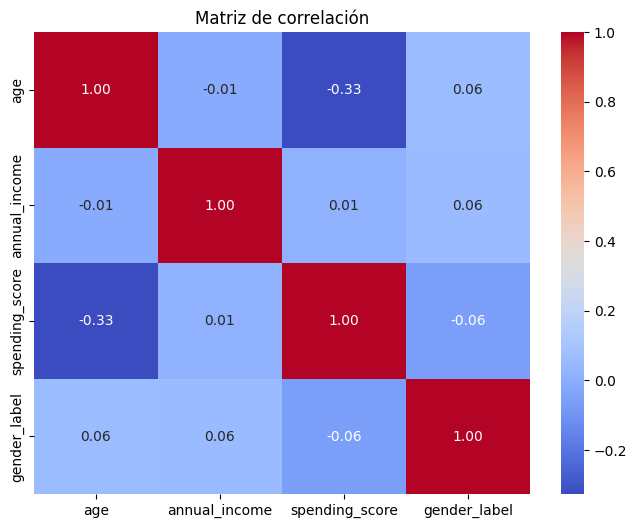

In [20]:
# Selección de variables
variables = ["age", "annual_income", 
             "spending_score", "gender_label"]

# Calcular matriz de correlación
corr_matrix = df[variables].corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

1. **Edad vs Spending Score: -0.327**

   * Correlación negativa moderada → a mayor edad, menor puntaje de gasto.
   * Los clientes jóvenes tienden a gastar más que los mayores.

2. **Edad vs Annual Income: -0.012**

   * Correlación prácticamente nula.
   * La edad no influye directamente en los ingresos anuales de esta muestra.
   * La **edad** es la única variable que muestra una relación moderada (negativa) con el gasto → los más jóvenes gastan más.

3. **Ingreso anual vs Spending Score: 0.0099**

   * Correlación casi cero.
   * Tener más ingresos **no garantiza gastar más en el centro comercial**.
   * Esto es clave: algunos clientes con ingresos altos no gastan mucho, y viceversa.

4. **Gender vs otras variables:**

   * Correlaciones muy bajas (todas < ±0.06).
   * El género **no influye significativamente** en edad, ingresos ni puntaje de gasto.
   * **Ingresos y género** no parecen ser factores determinantes en el gasto dentro del centro comercial.

In [21]:
# Calcular matriz de correlación
print(corr_matrix)

                     age  annual_income  spending_score  gender_label
age             1.000000      -0.012398       -0.327227      0.060867
annual_income  -0.012398       1.000000        0.009903      0.056410
spending_score -0.327227       0.009903        1.000000     -0.058109
gender_label    0.060867       0.056410       -0.058109      1.000000


_________________________________________________________________________________

### Nota:

Segun los resultados anteriores, el géneno no aporta mucho valor para el agrupamiento, por lo tanto, se ha decidido eliminar esta varialble. 

In [22]:
df.head(4)

,gender,age,annual_income,spending_score,gender_label
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0


In [23]:
del df["gender"]

In [24]:
df.head(4)

,age,annual_income,spending_score,gender_label
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0


In [25]:
df= df[NUMERICAL_COLUMNS]

____________________________________________


### Standard Scaler 

Aplicar un *StandardScaler* antes de ejecutar K-Means es una práctica recomendada para mejorar la calidad de los agrupamientos y la interpretabilidad de los resultados. Esto ayuda a que el algoritmo se centre en las diferencias relevantes entre las muestras, en lugar de ser dominado por algunas características con mayor varianza. Otras razones por la que la estandarización de las características (features) mediante un *StandardScaler* es un paso importante en el proceso de agrupamiento (clustering) con K-Means, son las siguientes:

1. **Escala de las características**: K-Means asume que todas las características tienen la misma escala. Si las características tienen escalas muy diferentes, algunas características dominarán la función objetivo del algoritmo, lo que puede llevar a resultados sesgados. Estandarizar las características a una media de 0 y una desviación estándar de 1 ayuda a que todas las características tengan la misma importancia.

2. **Sensibilidad a la escala**: K-Means es sensible a la escala de las características. Si algunas características tienen una varianza mucho mayor que otras, el algoritmo se centrará más en esas características con mayor varianza, ignorando el resto. La estandarización ayuda a que todas las características tengan la misma importancia.

3. **Convergencia del algoritmo**: La estandarización puede mejorar la convergencia del algoritmo K-Means, ya que las características estandarizadas tienen propiedades estadísticas más uniformes, lo que facilita que el algoritmo encuentre los centroides óptimos.

4. **Interpretabilidad**: Después de estandarizar las características, los centroides encontrados por K-Means serán más fáciles de interpretar, ya que estarán en la misma escala.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[NUMERICAL_COLUMNS] = scaler.fit_transform(df[NUMERICAL_COLUMNS])

In [27]:
df.head(4)

,age,annual_income,spending_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418


_______________________________________________________


### Definición de una semilla aleatoria


Se define una semilla aletoria para garantizar la reproducibilidad de los datos. 
De esta manera, cuando se ejecuten nuevamente, se obtengan los mismos resultados.
Esta semilla se usa tanto para la separación del dataset como entrada del 
algoritmo de agrupamiento. 

In [28]:
import random

RANDOM_SEED = 42

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [29]:
from sklearn.model_selection import train_test_split


df_tran, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

In [30]:
from sklearn.cluster import KMeans


K_VALUES = list(range(1, 16))

inertia = []
for n in K_VALUES:
    kmeans = KMeans(n_clusters=n, random_state=RANDOM_SEED)
    kmeans.fit(df_tran)
    inertia.append(kmeans.inertia_)

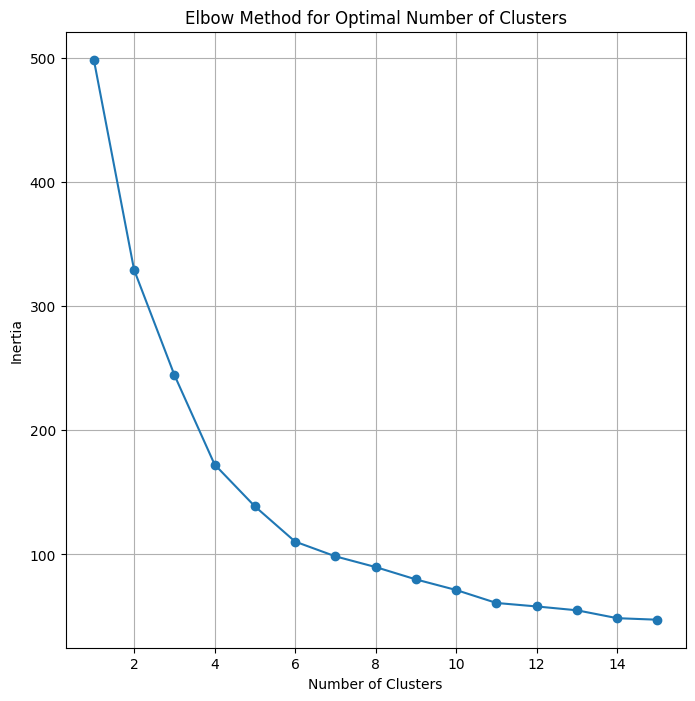

In [31]:
plt.figure(figsize=(8,8))
plt.plot(K_VALUES, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [32]:
for k, iner in zip(K_VALUES, inertia):
    print(f"k = {k}, inertia = {iner:.2f}")

k = 1, inertia = 498.36
k = 2, inertia = 329.17
k = 3, inertia = 244.55
k = 4, inertia = 172.40
k = 5, inertia = 138.69
k = 6, inertia = 110.31
k = 7, inertia = 98.45
k = 8, inertia = 89.81
k = 9, inertia = 79.88
k = 10, inertia = 71.33
k = 11, inertia = 60.90
k = 12, inertia = 58.10
k = 13, inertia = 55.01
k = 14, inertia = 48.66
k = 15, inertia = 47.41


### Paso 1: Revisar las caidas de la variable inercia

Lo resultados para calcular la variación de **inertia** es la siguiente: 

In [33]:
from itertools import pairwise


for i, (i1, i2) in enumerate(pairwise(inertia)):
    diff = i1 - i2
    print(f"k={i} → k={i + 1}: {diff:.2f}")

k=0 → k=1: 169.19
k=1 → k=2: 84.62
k=2 → k=3: 72.15
k=3 → k=4: 33.71
k=4 → k=5: 28.38
k=5 → k=6: 11.86
k=6 → k=7: 8.64
k=7 → k=8: 9.94
k=8 → k=9: 8.54
k=9 → k=10: 10.43
k=10 → k=11: 2.80
k=11 → k=12: 3.09
k=12 → k=13: 6.35
k=13 → k=14: 1.25


### Paso 2: Búsqueda del punto de quiebre.

* Las grandes caidas se encuentran por encima de  **k=4 o 5**.
* Después de **k=6** la caida es menos pronunciada (<15).
* Para **k=7** en adelante, las ganancia es **basate baja** en comparación a las anteriores.

---

### Paso 3: Conclusiones

El punto ideal se encuentra en **k=4 o k=5**.

* **k=4**: Hay grandes cambios de inercia antes de este valor, después de éste valor la tasa de decrecimiento de la inercia empieza a disminuir.
* **k=5**: Es un valor razonable de k, pero a partir de allí no se recomiendan valores para k.

👉 Se ha elegido un valor de 5. Porque es el que visualmente mejor "encaja" 
para la gráfica de relación entre la variable `anual_income` y `spending_score`. 

In [56]:
BEST_K = 5

best_kmeans = KMeans(n_clusters=BEST_K, random_state=RANDOM_SEED)
__ = best_kmeans.fit(df_tran)

_________________________

### Resultados obtenidos con el mejor K

En en las siguientes lineas de codigo se observan los centroides

In [57]:
best_clusters = best_kmeans.cluster_centers_

In [58]:
print(best_kmeans.feature_names_in_)
for c in best_clusters:
    print(c)

['age' 'annual_income' 'spending_score']
[-0.94890585 -0.79364008  0.50233294]
[ 0.49624555 -1.27647552 -1.2660396 ]
[-0.40958275  1.02010526  1.24450832]
[ 0.00544895  1.04454177 -1.18678949]
[ 1.24401891 -0.20519082 -0.04760749]


In [37]:
df_clusters = pd.DataFrame(
    data=best_kmeans.cluster_centers_, 
    columns=best_kmeans.feature_names_in_
)

df_clusters[NUMERICAL_COLUMNS] = scaler.inverse_transform(df_clusters[NUMERICAL_COLUMNS])

Aprovechando el hecho que solo se tienen tres dimensiones es posible realizar una visualización en un plano cartesiano de los datos. 

In [38]:
df_clusters

,age,annual_income,spending_score
0,25.627907,39.767442,63.139535
1,45.764706,27.117647,17.588235
2,33.142857,87.285714,82.257143
3,38.925926,87.925926,19.629630
4,56.184211,55.184211,48.973684


##### Visualización de los clusters

En este paso se visualizan solamente los cluster. 

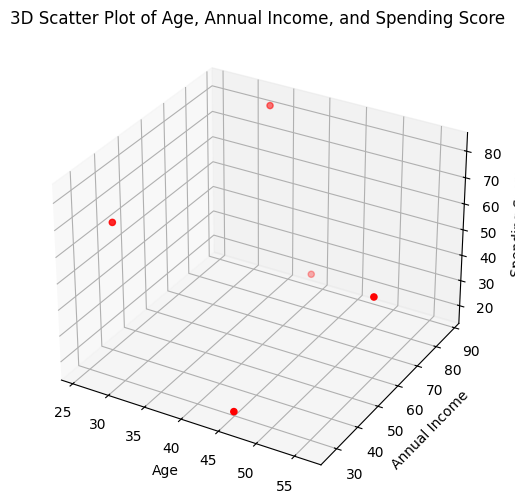

In [39]:
# Crear figura y eje 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotear los puntos en 3D
ax.scatter(
    df_clusters['age'],
    df_clusters['annual_income'],
    df_clusters['spending_score'],
    c='r',
    marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

# Título
ax.set_title('3D Scatter Plot of Age, Annual Income, and Spending Score')

# Mostrar gráfico
plt.show()

In [ ]:

df_train_restored = df_tran.copy()
df_train_restored["y_predict"] = best_kmeans.predict(df_train_restored)

df_train_restored[NUMERICAL_COLUMNS] = scaler.inverse_transform(df_train_restored[NUMERICAL_COLUMNS])



/tmp/ipykernel_154383/338871085.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


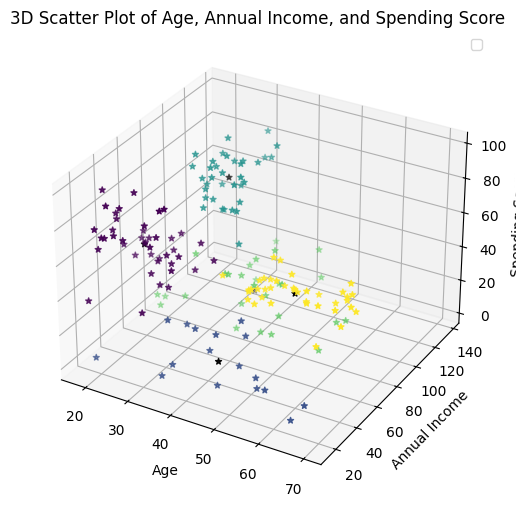

In [ ]:
# Crear figura y eje 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotear los puntos en 3D
ax.scatter(
    df_clusters['age'],
    df_clusters['annual_income'],
    df_clusters['spending_score'],
    c='black',
    marker='*')

ax.scatter(
    df_train_restored['age'],
    df_train_restored['annual_income'],
    df_train_restored['spending_score'],
    c=df_train_restored['y_predict'],
    marker='*')



# Etiquetas de los ejes
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.legend()

# Título
ax.set_title('3D Scatter Plot of Age, Annual Income, and Spending Score')

# Mostrar gráfico
plt.show()

Se contruye una gráfica pairplot para obtener una visión más amplia de cómo el modelo hace las inferencias. En esta gráfica el color representa el grupo al que pertenece un elemento. 

- Se observan las características de los cinco grupo.
    - **grupo 0** (rojo) Personas de poca edad con alto `speding_score` y bajos ingresos. 
    - **grupo 1** (azul) Personas de mayor edad con bajo `speding_score` y bajos ingresos. 
    - **grupo 2** (verde) Personas de mediana edad con alto `speding_score` y altos ingresos. 
    - **grupo 3** (morado) Personas de poca edad con alto `speding_score` y bajos ingresos. 
    - **grupo 4** (naranja) Personas de mayor edad con mediano `speding_score` e ingresos medios. 

- 


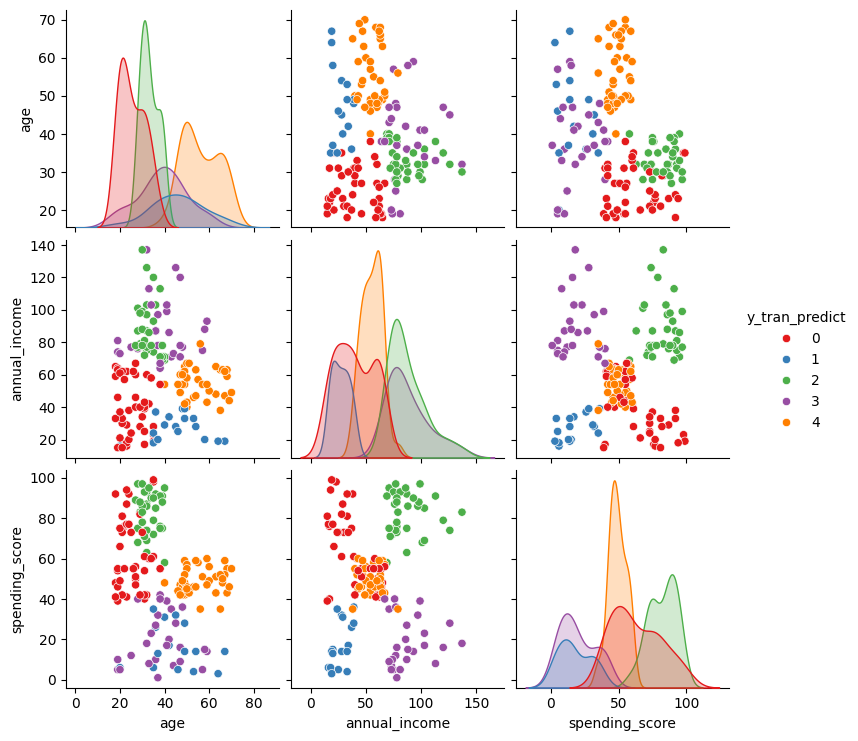

In [ ]:
# Seleccionamos solo las columnas numéricas y agregamos Gender
variables = ["age", "annual_income", "spending_score", "y_predict"]

# Pairplot
sns.pairplot(
    df_train_restored[variables], 
    hue="y_predict", 
    palette="Set1",
    diag_kind="kde"
)
plt.show()

________________________________ 

### Predeicciones para la muestra obtenida


Se hacen las predicciones con los datos de test de la misma forma a cómo se hizo con los datos de 
entrenamiento, se espera que el modelo siga los mismos patrones con estos datos. 

In [51]:
df_test_scaled = df_test.copy()

df_test_scaled["y_predict"] = best_kmeans.predict(df_test_scaled)
df_test_scaled[NUMERICAL_COLUMNS] = scaler.inverse_transform(df_test_scaled[NUMERICAL_COLUMNS])


/tmp/ipykernel_154383/1905350094.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


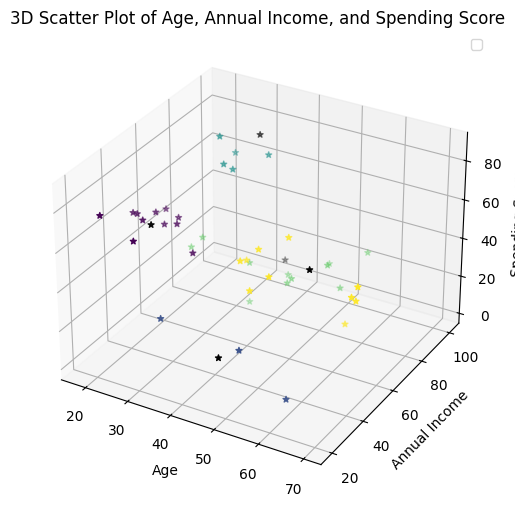

In [52]:
# Crear figura y eje 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotear los puntos en 3D
ax.scatter(
    df_clusters['age'],
    df_clusters['annual_income'],
    df_clusters['spending_score'],
    c='black',
    marker='*')

ax.scatter(
    df_test_scaled['age'],
    df_test_scaled['annual_income'],
    df_test_scaled['spending_score'],
    c=df_test_scaled['y_predict'],
    marker='*')



# Etiquetas de los ejes
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.legend()

# Título
ax.set_title('3D Scatter Plot of Age, Annual Income, and Spending Score')

# Mostrar gráfico
plt.show()

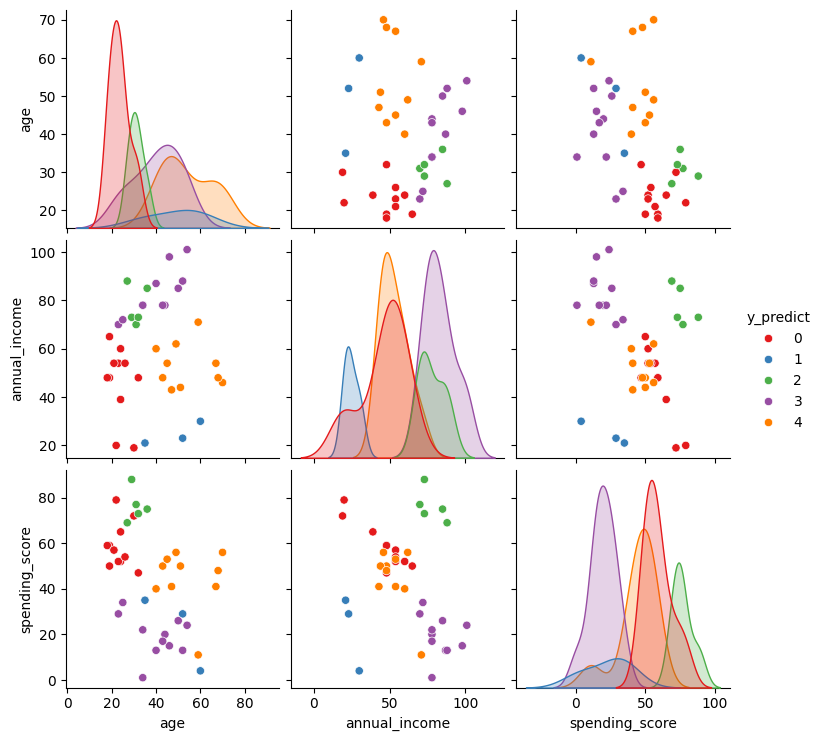

In [53]:
# Seleccionamos solo las columnas numéricas y agregamos Gender
variables = ["age", "annual_income", "spending_score", "y_predict"]

# Pairplot
sns.pairplot(
    df_test_scaled[variables], 
    hue="y_predict", 
    palette="Set1",
    diag_kind="kde"
)
plt.show()

Esta gráfica confirma que el modelo sigue el mismo patrón de agrupamiento con los datos de prueba y los datos de entrenamiento. 

___________________


[!["Buy Me A Coffee"](https://www.buymeacoffee.com/assets/img/custom_images/orange_img.png)](https://www.buymeacoffee.com/jelambrar1)

Made with Love ❤️ by [@jelambrar96](https://github.com/jelambrar96)
